# Изучаемый предмет: "Заболевание печени"
# Бизнес-задачи:
Количество пациентов с заболеваниями печени постоянно увеличивается из-за чрезмерного употребления алкоголя, вдыхания вредных газов, употребления зараженной пищи, солений и наркотиков. Этот набор данных был использован для оценки алгоритмов прогнозирования с целью снижения нагрузки на врачей.

Ссылка: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_validate
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета + Первичный анализ данных

In [ ]:
df = pd.read_csv("/content/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Таргетовая перменная в данном датасете - это Dataset, которая рассказывает о том, есть ли у человека заболевание печени или нет.

Также данные содержат такие признаки, как:

Age-Возраст пациента

Gender-Пол пациента

А также результаты анализов:

Total_Bilirubin-Билирубин общий

Direct_Bilirubin-Прямой билирубин

Alkaline_Phosphotase-Щелочная фосфотаза

Alamine_Aminotransferase-Аламинаминотрансфераза

Aspartate_Aminotransferase-Аспартатаминотрансфераза

Total_Protiens-Всего Протеинов

Albumin-Альбумин

Albumin_and_Globulin_Ratio-Соотношение альбумина и глобулина

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.shape

(583, 11)

# Предобработка данных

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
df[['Albumin_and_Globulin_Ratio']] = imputer.fit_transform(df[['Albumin_and_Globulin_Ratio']])
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


Все значения числовые и ненулевые.

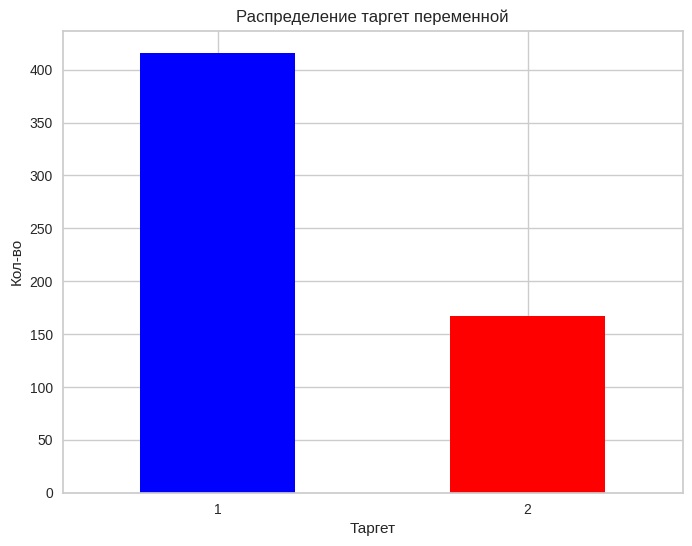

In [ ]:
target_counts = df['Dataset'].value_counts()

# Построение графика
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Распределение таргет переменной')
plt.xlabel('Таргет')
plt.ylabel('Кол-во')
plt.xticks(rotation=0)
plt.show()

In [ ]:
X_orig = df.drop(columns=['Dataset'])
y_orig = df['Dataset']

oversample = RandomOverSampler(random_state=42)
X, y = oversample.fit_resample(X_orig, y_orig)

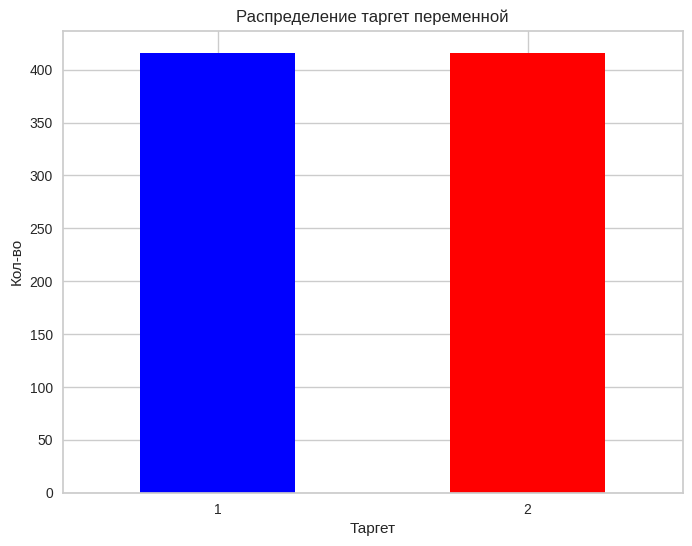

In [ ]:
target_counts = y.value_counts()

# Построение графика
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Распределение таргет переменной')
plt.xlabel('Таргет')
plt.ylabel('Кол-во')
plt.xticks(rotation=0)
plt.show()

In [ ]:
data = pd.concat([pd.DataFrame(X), pd.Series(y)], axis = 1)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
827,56,1,1.0,0.3,195,22,28,5.8,2.6,0.80,2
828,22,1,2.7,1.0,160,82,127,5.5,3.1,1.20,2
829,65,1,1.4,0.6,260,28,24,5.2,2.2,0.70,2
830,62,1,0.7,0.2,173,46,47,7.3,4.1,1.20,2


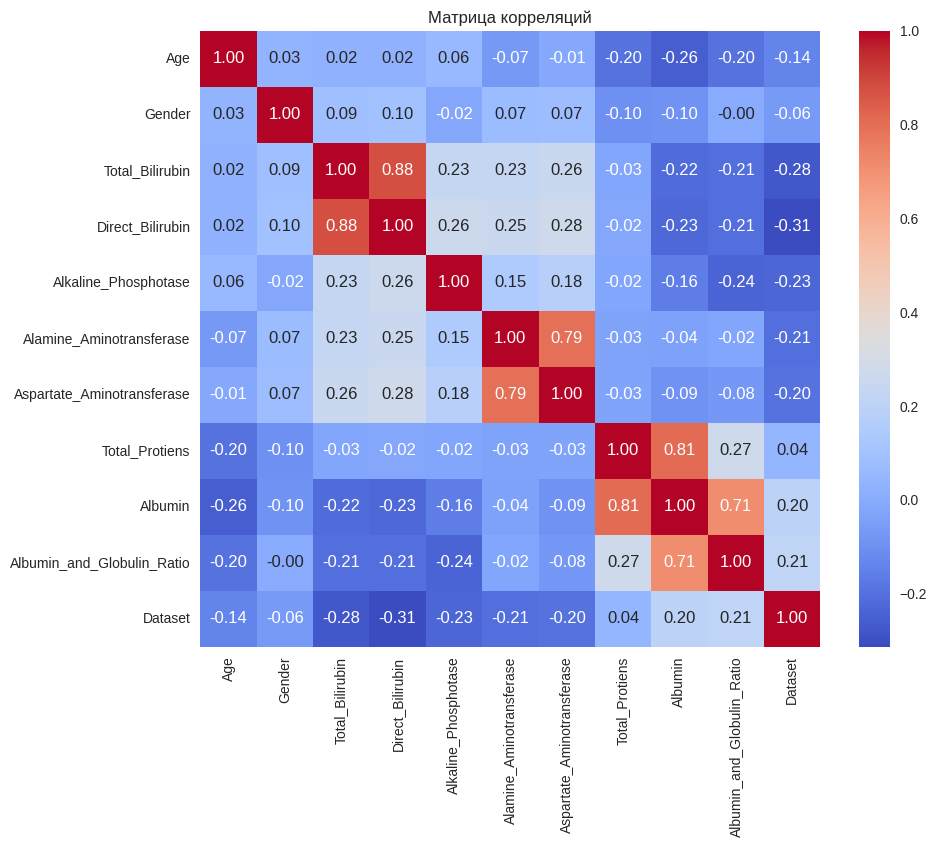

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [ ]:
data['Bilirubin'] = data['Direct_Bilirubin'] + data['Total_Bilirubin']
data['Aminotransferase'] = data['Aspartate_Aminotransferase'] + data['Alamine_Aminotransferase']
data = data.drop(['Direct_Bilirubin', 'Total_Bilirubin', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Albumin'], axis=1)
data

,Age,Gender,Alkaline_Phosphotase,Total_Protiens,Albumin_and_Globulin_Ratio,Dataset,Bilirubin,Aminotransferase
0,65,0,187,6.8,0.90,1,0.8,34
1,62,1,699,7.5,0.74,1,16.4,164
2,62,1,490,7.0,0.89,1,11.4,128
3,58,1,182,6.8,1.00,1,1.4,34
4,72,1,195,7.3,0.40,1,5.9,86
...,...,...,...,...,...,...,...,...
827,56,1,195,5.8,0.80,2,1.3,50
828,22,1,160,5.5,1.20,2,3.7,209
829,65,1,260,5.2,0.70,2,2.0,52
830,62,1,173,7.3,1.20,2,0.9,93


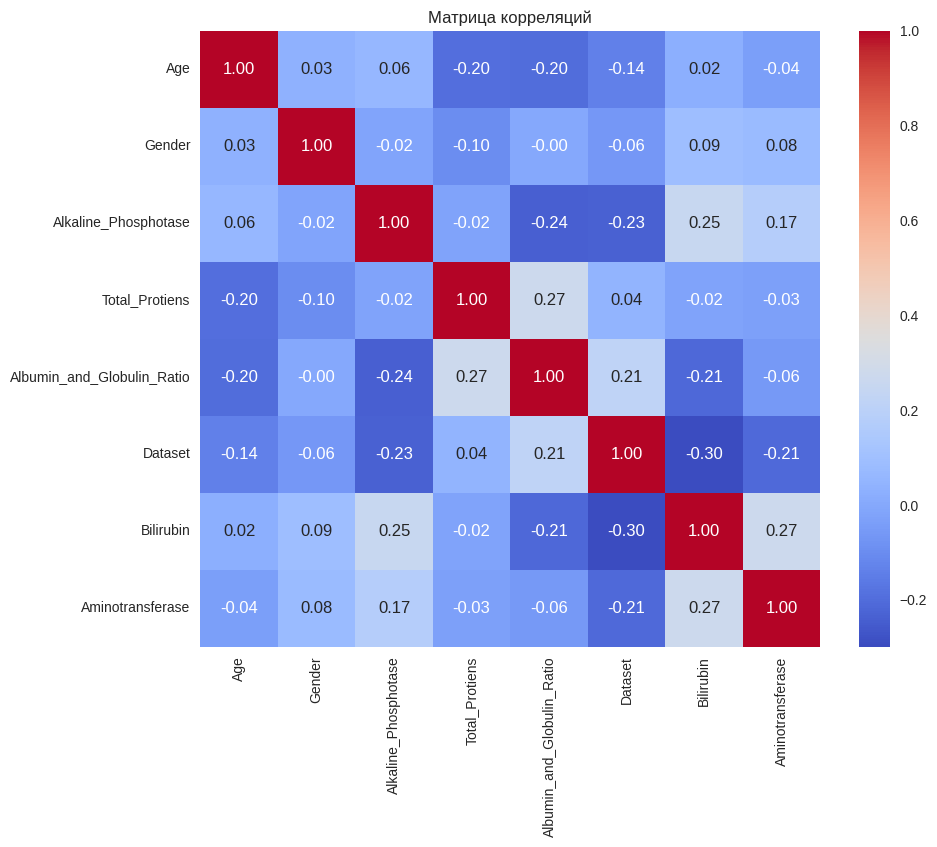

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

# Построение моделей

In [ ]:
y_transformed = y.replace({1: 0, 2: 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=42)
def calculate_metrics(y_true, y_pred, model_name):
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    res = pd.DataFrame({
        'model': [model_name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
    })

    return res

In [ ]:
results = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1'])

# Логистическая регрессия
model1 = LogisticRegression(random_state = 42).fit(X_train, y_train)
y_pred = model1.predict(X_test)
results = pd.concat([results, calculate_metrics(y_test, y_pred, 'LogisticRegression')], ignore_index=True)

# Метод опорных векторов (SVM)
model2 = SVC(random_state = 42).fit(X_train, y_train)
y_pred = model2.predict(X_test)
results = pd.concat([results, calculate_metrics(y_test, y_pred, 'SVC')], ignore_index=True)

# Дерево решений
model3 = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
y_pred = model3.predict(X_test)
results = pd.concat([results, calculate_metrics(y_test, y_pred, 'DecisionTreeClassifier')], ignore_index=True)


# Наивный байесовский классификатор
model4 = GaussianNB().fit(X_train, y_train)
y_pred = model4.predict(X_test)
results = pd.concat([results, calculate_metrics(y_test, y_pred, 'GaussianNB')], ignore_index=True)

results

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.697115,0.685039,0.790909,0.734177
1,SVC,0.663462,0.638889,0.836364,0.724409
2,DecisionTreeClassifier,0.841346,0.813008,0.909091,0.858369
3,GaussianNB,0.701923,0.644578,0.972727,0.775362


В задаче классификации по определению заболевания печени наиболее эффективной оказалась модель "DecisionTreeClassifier", показавшая лучшие результаты по всем метрикам. Модель "GaussianNB", несмотря на высокую точность, имеет низкую полноту, что может привести к большому количеству пропущенных случаев заболевания.

# Диагностика лучшей модели

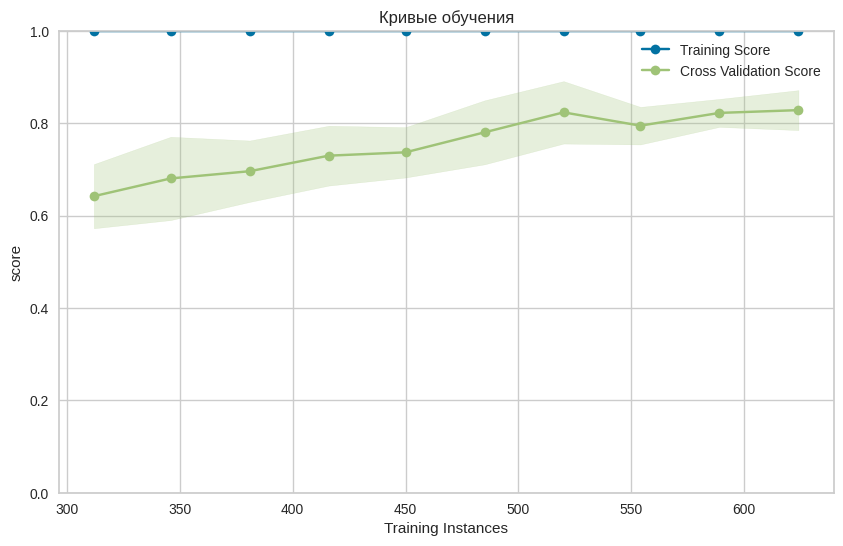

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(10, 6))
plt.title('Кривые обучения')
visualizer = LearningCurve(
     DecisionTreeClassifier(), train_sizes=np.linspace(0.5, 1.0, 10), cv=StratifiedKFold(4)
).fit(X, y)
plt.ylim(0, 1)
plt.xlabel('Training Instances')
plt.ylabel('score')
plt.legend()
plt.show()

# Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# Сетка гиперпараметров
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
model_dt = DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Точность (precision)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Полнота (recall)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1-оценка
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.70
Recall: 0.85
F1 Score: 0.77


Предсказания стали более точными после настройки гиперпараметров, однако не стали более полными, а ноборот уменьшились.

# Ансамблевая модель

In [ ]:
model_clf = RandomForestClassifier()
model_clf.fit(X_train, y_train)
y_pred = model_clf.predict(X_test)
calculate_metrics(y_test, y_pred, 'RandomForestClassifier')

,model,accuracy,precision,recall,f1
0,RandomForestClassifier,0.802885,0.789916,0.854545,0.820961


In [ ]:
import time
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
start_time = time.time()
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
end_time = time.time()

print("Лучшие гиперпараметры для Случайного леса:")
print(rf_grid_search.best_params_)
print("Время обучения: {:.4f} секунд".format(end_time-start_time))

Лучшие гиперпараметры для Случайного леса:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Время обучения: 240.2032 секунд


In [ ]:
best_rf_model = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
calculate_metrics(y_test, y_pred, 'RandomForestClassifier')

,model,accuracy,precision,recall,f1
0,RandomForestClassifier,0.8125,0.803419,0.854545,0.828194


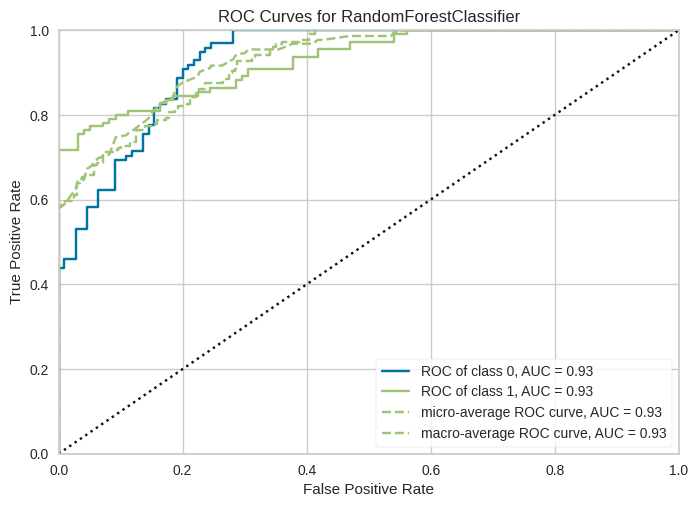

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve
visualizer = ROCAUC(best_rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

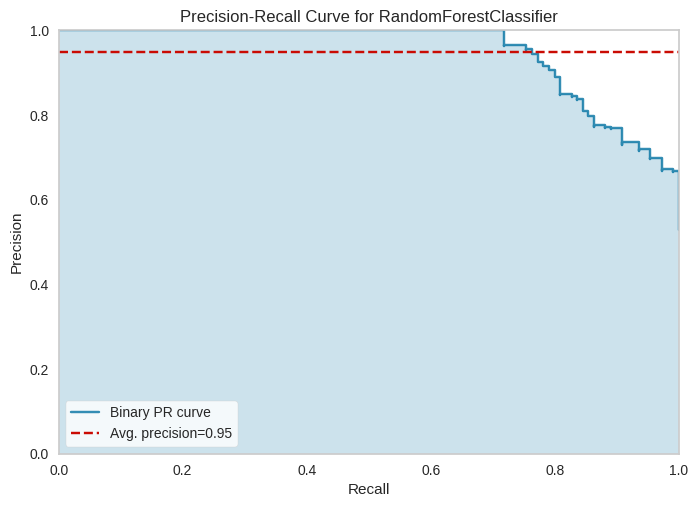

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
visualizer = PrecisionRecallCurve(best_rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

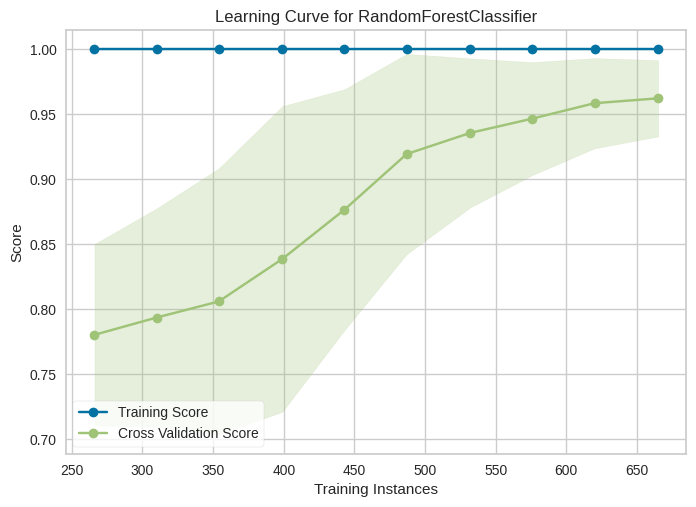

In [ ]:
visualizer = LearningCurve(
    best_rf_model, scoring='roc_auc', train_sizes=np.linspace(0.4, 1.0, 10)
).fit(X, y).show()

В ходе работы были использованы некоторые алгоритмы машинного обучения для решения задач классификации. Для каждого алгоритма было оценено качество модели с помощью разных метрик. В поставленной задаче по определению заболевания печени наиболее эффективной оказалась модель "DecisionTreeClassifier", показавшая лучшие результаты по всем метрикам.
Была построена качественная модель для поставленой задачи.

In [ ]:
%%ешьу